In [0]:
#!unzip air-pollution-in-seoul.zip

In [78]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [80]:
# Retriving data for station code 103 for SO2
data_103=data[(data['Station code']==103) & (data['SO2']>0)]
print(len(data_103))
print(data_103.head(10))

25594
       Measurement date  Station code  ...  PM10  PM2.5
51810  2017-01-01 00:00           103  ...  70.0   68.0
51811  2017-01-01 01:00           103  ...  73.0   66.0
51812  2017-01-01 02:00           103  ...  67.0   65.0
51813  2017-01-01 03:00           103  ...  68.0   65.0
51814  2017-01-01 04:00           103  ...  65.0   61.0
51815  2017-01-01 05:00           103  ...  62.0   59.0
51816  2017-01-01 06:00           103  ...  66.0   61.0
51817  2017-01-01 07:00           103  ...  65.0   58.0
51818  2017-01-01 08:00           103  ...  67.0   69.0
51819  2017-01-01 09:00           103  ...  70.0   74.0

[10 rows x 11 columns]


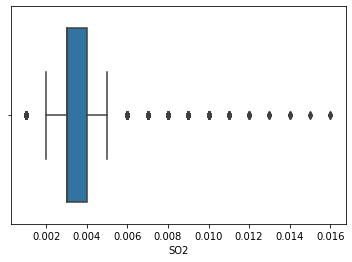

In [81]:
import seaborn as sns
sns.boxplot(data_103['SO2'])

25211


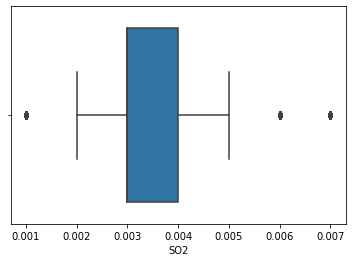

In [82]:
from scipy import stats
z = np.abs(stats.zscore(data_103['SO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_103_Rout = data_103[(z < 3)]
print(len(data_103_Rout))
sns.boxplot(data_103_Rout['SO2'])

In [83]:
df=data_103_Rout['SO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25211, 1)


In [84]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.007]
25211
0.0 1.0


In [85]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25206 [0.6666666666666667, 0.5, 0.6666666666666667, 0.5, 0.5]


In [86]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25206, 5)


,x1,x2,x3,x4,y
0,0.666667,0.500000,0.666667,0.500000,0.500000
1,0.500000,0.666667,0.500000,0.500000,0.500000
2,0.666667,0.500000,0.500000,0.500000,0.500000
3,0.500000,0.500000,0.500000,0.500000,0.500000
4,0.500000,0.500000,0.500000,0.500000,0.500000
5,0.500000,0.500000,0.500000,0.500000,0.500000
6,0.500000,0.500000,0.500000,0.500000,0.666667
7,0.500000,0.500000,0.500000,0.666667,0.666667
8,0.500000,0.500000,0.666667,0.666667,0.666667
9,0.500000,0.666667,0.666667,0.666667,1.000000


In [87]:
print(matrix[:,4])

[[0.5       ]
 [0.5       ]
 [0.5       ]
 ...
 [0.33333333]
 [0.33333333]
 [0.16666667]]


In [88]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8318, 1) [[0.19317806]
 [0.19317806]
 [0.48169928]
 [0.75552195]
 [0.55710642]]


In [89]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.7233903572656631
[0.04539339]
[[0.04228875 0.04367211 0.13048003 0.67026714]]


In [90]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.009687222705457788
absolute mean error :  0.06728271857989028
0.7313727751762289


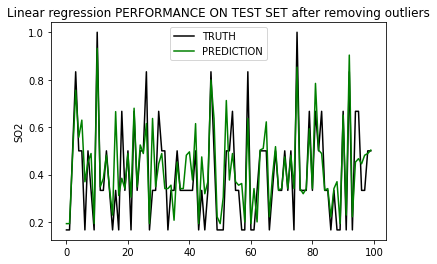

In [91]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('SO2')
plt.legend()
plt.show()

(25594, 1)
[0.001] [0.016]
25594
0.0 1.0000000000000002
25589 [0.2666666666666667, 0.20000000000000004, 0.2666666666666667, 0.20000000000000004, 0.20000000000000004]
(8445, 1) [[0.12679464]
 [0.1372841 ]
 [0.20724183]
 [0.07781581]
 [0.20497412]]
mean squared eror :  0.0019253426519225032
absolute mean error :  0.028609935998897735
0.7441131637073375


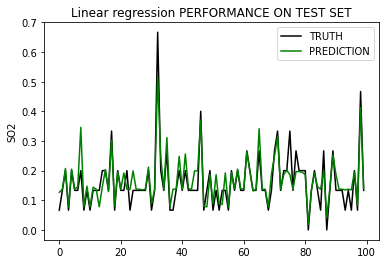

In [92]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_103['SO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [93]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0019253606344454232
absolute mean error :  0.02861241686772145
0.7441107737478703


In [94]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0018960295005038133
absolute mean error :  0.02863635740876805
0.7480090154773102


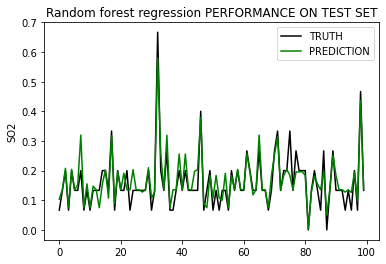

truth :  [[0.06666667]
 [0.13333333]
 [0.2       ]
 [0.06666667]
 [0.2       ]
 [0.13333333]
 [0.13333333]
 [0.2       ]
 [0.06666667]
 [0.13333333]]
prediction :  [0.10364893 0.1354499  0.20776004 0.07486395 0.20420421 0.1354499
 0.15269899 0.31990931 0.07486395 0.1554694 ]


In [95]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [96]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0019272249605466962
0.028774248460847612
0.7438629962899741


In [97]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.0021272284703893326
absolute mean error :  0.025356226591081672
0.7172816159159623


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


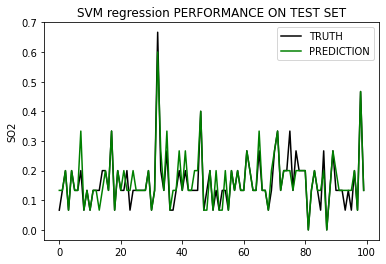

In [98]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [99]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17144/17144 [==============================] - 1s 71us/step - loss: 0.0023 - accuracy: 0.0050
Epoch 2/100
17144/17144 [==============================] - 1s 65us/step - loss: 0.0021 - accuracy: 0.0050
Epoch 3/100
17144/17144 [==============================] - 1s 68us/step - loss: 0.0020 - accuracy: 0.0050
Epoch 4/100
17144/17144 [==============================] - 1s 65us/step - loss: 0.0021 - accuracy: 0.0050
Epoch 5/100
17144/17144 [==============================] - 1s 64us/step - loss: 0.0020 - accuracy: 0.0050
Epoch 6/100
17144/17144 [==============================] - 1s 65us/step - loss: 0.0020 - accuracy: 0.0050
Epoch 7/100
17144/17144 [==============================] - 1s 66us/step - loss: 0.0020 - accuracy: 0.0050
Epoch 8/100
17144/17144 [==============================] - 1s 66us/step - loss: 0.0020 - accuracy: 0.0050
Epoch 9/100
17144/17144 [==============================] - 1s 67us/step - loss: 0.0020 - accuracy: 0.0050
Epoch 10/100
17144/17144 [====================

dict_keys(['loss', 'accuracy'])


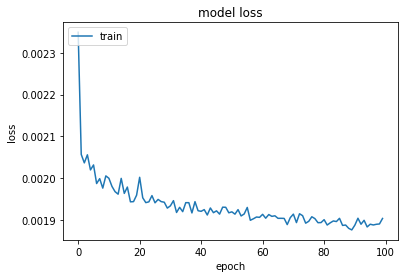

mean squared error :  0.0019112764829975351
mean absolute error :  0.025356226591081672
0.7172816159159623


In [100]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


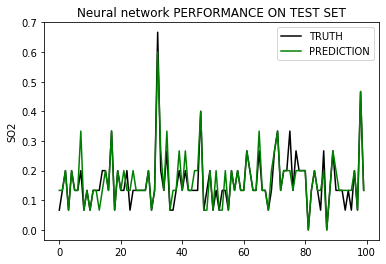

In [101]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [102]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.2        0.26666667 0.26666667 0.26666667]
 [0.4        0.4        0.26666667 0.26666667]
 [0.2        0.2        0.2        0.2       ]
 ...
 [0.2        0.2        0.2        0.2       ]
 [0.13333333 0.13333333 0.2        0.2       ]
 [0.13333333 0.13333333 0.13333333 0.13333333]]
(17144, 4)
(17144, 4, 1)


In [103]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17144/17144 [==============================] - 7s 427us/step - loss: 0.0043
Epoch 2/100
17144/17144 [==============================] - 6s 363us/step - loss: 0.0022
Epoch 3/100
17144/17144 [==============================] - 7s 384us/step - loss: 0.0021
Epoch 4/100
17144/17144 [==============================] - 6s 376us/step - loss: 0.0021
Epoch 5/100
17144/17144 [==============================] - 6s 374us/step - loss: 0.0021
Epoch 6/100
17144/17144 [==============================] - 6s 373us/step - loss: 0.0021
Epoch 7/100
17144/17144 [==============================] - 6s 378us/step - loss: 0.0020
Epoch 8/100
17144/17144 [==============================] - 7s 389us/step - loss: 0.0021
Epoch 9/100
17144/17144 [==============================] - 6s 378us/step - loss: 0.0020
Epoch 10/100
17144/17144 [==============================] - 6s 377us/step - loss: 0.0020
Epoch 11/100
17144/17144 [==============================] - 6s 374us/step - loss: 0.0020
Epoch 12/100
17144/17144 [====

dict_keys(['loss'])


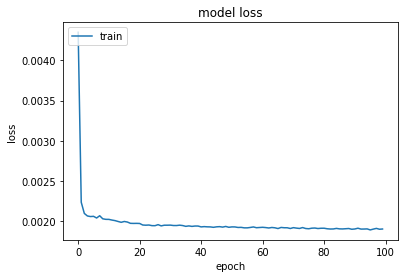

mean square error : 0.0018640589649803788
mean absolute error :  0.029579641736598335
0.7522580457377187


In [104]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

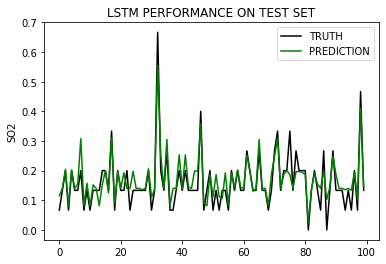

In [105]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')